In [1]:
import tensorflow as tf
import numpy as np
from scipy.io import wavfile
from scipy.signal import spectrogram, stft, istft
import matplotlib.pyplot as plt
import librosa
import librosa.display
from misceallaneous import getWavFileAsNpArray, displaySpectrogram
from IPython.display import Audio

samplerate = 12000
nperseg = 1024

clean0 = getWavFileAsNpArray("../dataset_2/clean/p1.wav")
white0 = getWavFileAsNpArray("../dataset_2/white/p1.wav")
clean0 = np.array(clean0, dtype="int32")
white0 = np.array(white0, dtype="int32")


min_clean = np.min(clean0)
max_clean = np.max(clean0)
clean = (clean0 - min_clean)/(max_clean-min_clean)

min_white = np.min(white0)
max_white = np.max(white0)
white = (white0 - min_white)/(max_white-min_white)


In [2]:
clean_split = []
white_split = []

samples_length = nperseg

for i in range(0, clean.shape[0]-samples_length, samples_length):
    clean_split.append(clean[i:i+samples_length])
    white_split.append(white[i:i+samples_length])
clean_split = np.array(clean_split)
white_split = np.array(white_split)

c, t, Cxx_test = stft(np.array((clean_split[0]*(max_clean-min_clean)) + min_clean), fs=samplerate, nperseg=nperseg)
c, t, Vxx_test = stft(np.array((white_split[0]*(max_white-min_white)) + min_white), fs=samplerate, nperseg=nperseg)
print(clean_split.shape)
print(white_split.shape)

(10659, 1024)
(10659, 1024)


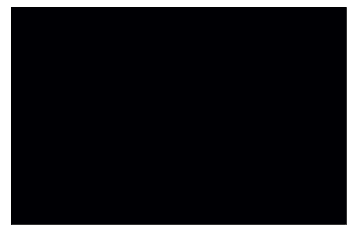

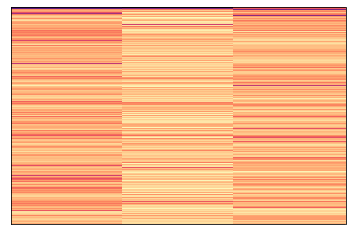

In [3]:
displaySpectrogram(Cxx_test)
plt.show()
displaySpectrogram(Vxx_test)
plt.show()

In [5]:
def simple_autoencoder(size):
    inputs = tf.keras.Input(shape=(size,))
    x = tf.keras.layers.Dense(int(size*0.5), activation="relu")(inputs)
    outputs = tf.keras.layers.Dense(size, activation="relu")(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="skip_autoencoder")
    model.summary()
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

def simple_skip_autoencoder(size):
    inputs = tf.keras.Input(shape=(size,))
    x1 = tf.keras.layers.LeakyReLU()(tf.keras.layers.Dense(int(size*0.5), activation="linear")(inputs))
    x2 = (tf.keras.layers.Dense(int(size*0.2), activation="linear")(x1))
    x3 = (tf.keras.layers.Dense(int(size*0.2), activation="linear")(x2))
    x4 = tf.keras.layers.LeakyReLU()(tf.keras.layers.Dense(int(size*0.5), activation="linear")(x3))
    x5 = tf.keras.layers.Add()([x1, x4])
    x6 = tf.keras.layers.LeakyReLU()(tf.keras.layers.Dense(size, activation="linear")(x5))
    x7 = tf.keras.layers.Add()([x6, inputs])
    outputs = tf.keras.layers.Dense(size, activation="sigmoid")(x7)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="skip_autoencoder")
    model.summary()
    model.compile(optimizer='adam', loss='bce', metrics=['accuracy'])
    return model

model = simple_skip_autoencoder(clean_split.shape[1])

Model: "skip_autoencoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1024)]       0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 512)          524800      input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_3 (LeakyReLU)       (None, 512)          0           dense_5[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 204)          104652      leaky_re_lu_3[0][0]              
___________________________________________________________________________________

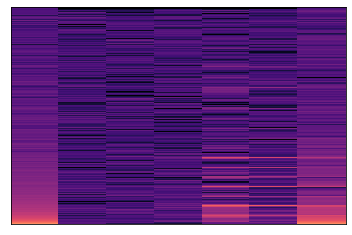

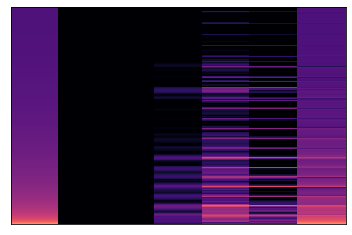

Epoch 1/15
667/667 [==============================] - 10s 14ms/step - loss: 0.6887 - accuracy: 0.0182
Epoch 2/15
667/667 [==============================] - 10s 15ms/step - loss: 0.6806 - accuracy: 0.0877
Epoch 3/15
667/667 [==============================] - 10s 15ms/step - loss: 0.6797 - accuracy: 0.1378
Epoch 4/15
667/667 [==============================] - 9s 14ms/step - loss: 0.6795 - accuracy: 0.1907
Epoch 5/15
667/667 [==============================] - 11s 17ms/step - loss: 0.6794 - accuracy: 0.2395
Epoch 6/15
667/667 [==============================] - 12s 17ms/step - loss: 0.6791 - accuracy: 0.2829
Epoch 7/15
667/667 [==============================] - 10s 16ms/step - loss: 0.6792 - accuracy: 0.3160
Epoch 8/15
667/667 [==============================] - 9s 13ms/step - loss: 0.6790 - accuracy: 0.3405
Epoch 9/15
667/667 [==============================] - 14s 20ms/step - loss: 0.6791 - accuracy: 0.3597
Epoch 10/15
667/667 [==============================] - 13s 19ms/step - loss: 0.6789 

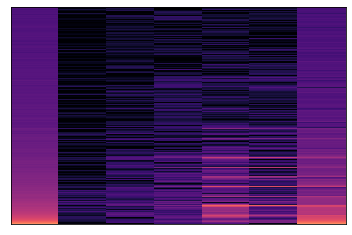

Epoch 1/15
667/667 [==============================] - 8s 12ms/step - loss: 0.6791 - accuracy: 0.3467
Epoch 2/15
667/667 [==============================] - 9s 14ms/step - loss: 0.6790 - accuracy: 0.3637
Epoch 3/15
667/667 [==============================] - 10s 14ms/step - loss: 0.6790 - accuracy: 0.3712
Epoch 4/15
667/667 [==============================] - 9s 13ms/step - loss: 0.6790 - accuracy: 0.3799
Epoch 5/15
667/667 [==============================] - 9s 13ms/step - loss: 0.6790 - accuracy: 0.3818
Epoch 6/15
667/667 [==============================] - 11s 16ms/step - loss: 0.6790 - accuracy: 0.3843
Epoch 7/15
667/667 [==============================] - 11s 17ms/step - loss: 0.6790 - accuracy: 0.4006
Epoch 8/15
667/667 [==============================] - 9s 14ms/step - loss: 0.6789 - accuracy: 0.4095
Epoch 9/15
667/667 [==============================] - 8s 11ms/step - loss: 0.6789 - accuracy: 0.4098
Epoch 10/15
667/667 [==============================] - 9s 13ms/step - loss: 0.6789 - acc

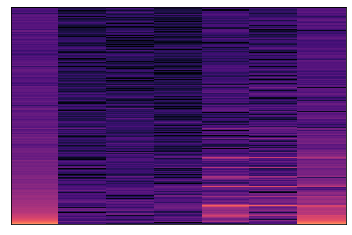

Epoch 1/15
667/667 [==============================] - 9s 13ms/step - loss: 0.6794 - accuracy: 0.2682
Epoch 2/15
667/667 [==============================] - 9s 14ms/step - loss: 0.6793 - accuracy: 0.2908
Epoch 3/15
667/667 [==============================] - 8s 11ms/step - loss: 0.6792 - accuracy: 0.3129
Epoch 4/15
667/667 [==============================] - 8s 11ms/step - loss: 0.6792 - accuracy: 0.3229
Epoch 5/15
667/667 [==============================] - 8s 12ms/step - loss: 0.6791 - accuracy: 0.3449
Epoch 6/15
667/667 [==============================] - 8s 12ms/step - loss: 0.6791 - accuracy: 0.3588
Epoch 7/15
667/667 [==============================] - 8s 12ms/step - loss: 0.6790 - accuracy: 0.3630
Epoch 8/15
667/667 [==============================] - 8s 12ms/step - loss: 0.6790 - accuracy: 0.3783
Epoch 9/15
667/667 [==============================] - 8s 11ms/step - loss: 0.6790 - accuracy: 0.3809
Epoch 10/15
667/667 [==============================] - 8s 12ms/step - loss: 0.6790 - accura

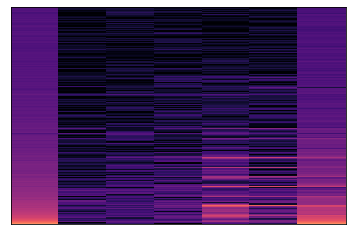

Epoch 1/15
667/667 [==============================] - 8s 11ms/step - loss: 0.6789 - accuracy: 0.4335
Epoch 2/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4378
Epoch 3/15
667/667 [==============================] - 8s 11ms/step - loss: 0.6789 - accuracy: 0.4361
Epoch 4/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4337
Epoch 5/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4323
Epoch 6/15
667/667 [==============================] - 8s 12ms/step - loss: 0.6789 - accuracy: 0.4383
Epoch 7/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4361
Epoch 8/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4388
Epoch 9/15
667/667 [==============================] - 8s 11ms/step - loss: 0.6789 - accuracy: 0.4408
Epoch 10/15
667/667 [==============================] - 8s 11ms/step - loss: 0.6789 - accura

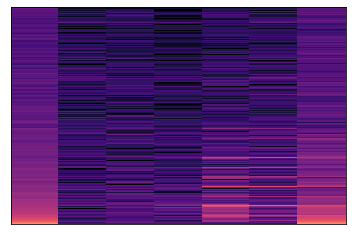

Epoch 1/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6791 - accuracy: 0.3505
Epoch 2/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6791 - accuracy: 0.3541
Epoch 3/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6791 - accuracy: 0.3629
Epoch 4/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6790 - accuracy: 0.3766
Epoch 5/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6790 - accuracy: 0.3803
Epoch 6/15
667/667 [==============================] - 8s 11ms/step - loss: 0.6790 - accuracy: 0.3928
Epoch 7/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6790 - accuracy: 0.4054
Epoch 8/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4255
Epoch 9/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4310
Epoch 10/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accura

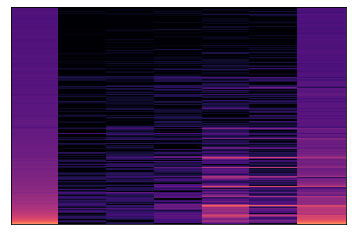

Epoch 1/15
667/667 [==============================] - 7s 10ms/step - loss: 0.6789 - accuracy: 0.4628
Epoch 2/15
667/667 [==============================] - 7s 11ms/step - loss: 0.8060 - accuracy: 0.2588
Epoch 3/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6792 - accuracy: 0.3411
Epoch 4/15
667/667 [==============================] - 7s 10ms/step - loss: 0.6791 - accuracy: 0.3715
Epoch 5/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6790 - accuracy: 0.3863
Epoch 6/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6790 - accuracy: 0.4040
Epoch 7/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6790 - accuracy: 0.4083
Epoch 8/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6790 - accuracy: 0.4128
Epoch 9/15
667/667 [==============================] - 8s 12ms/step - loss: 0.6790 - accuracy: 0.4207
Epoch 10/15
667/667 [==============================] - 8s 11ms/step - loss: 0.6789 - accura

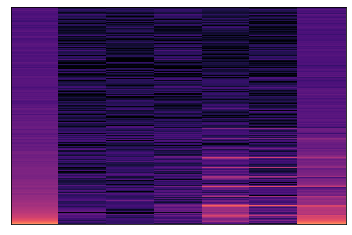

Epoch 1/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4654
Epoch 2/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4711
Epoch 3/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4683
Epoch 4/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4734
Epoch 5/15
667/667 [==============================] - 8s 11ms/step - loss: 0.6789 - accuracy: 0.4651
Epoch 6/15
667/667 [==============================] - 8s 11ms/step - loss: 0.8528 - accuracy: 0.2509
Epoch 7/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6792 - accuracy: 0.3280
Epoch 8/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6791 - accuracy: 0.3543
Epoch 9/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6791 - accuracy: 0.3727
Epoch 10/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6790 - accura

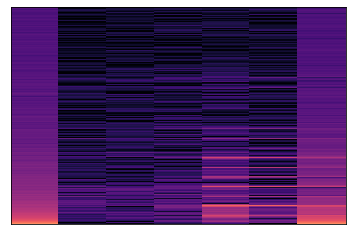

Epoch 1/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4387
Epoch 2/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4496
Epoch 3/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4539
Epoch 4/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4599
Epoch 5/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4666
Epoch 6/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4643
Epoch 7/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4716
Epoch 8/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4666
Epoch 9/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4651
Epoch 10/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accura

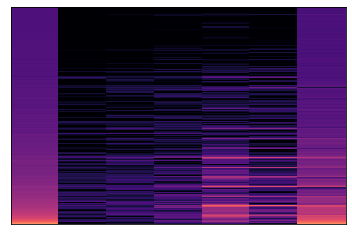

Epoch 1/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4635
Epoch 2/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4602
Epoch 3/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4605
Epoch 4/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4586
Epoch 5/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4630
Epoch 6/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4628
Epoch 7/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4650
Epoch 8/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4603
Epoch 9/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4657
Epoch 10/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accura

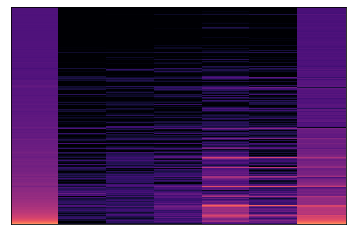

Epoch 1/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4690
Epoch 2/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4666
Epoch 3/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4670
Epoch 4/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4675
Epoch 5/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4722
Epoch 6/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4737
Epoch 7/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4678
Epoch 8/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4735
Epoch 9/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accuracy: 0.4700
Epoch 10/15
667/667 [==============================] - 7s 11ms/step - loss: 0.6789 - accura

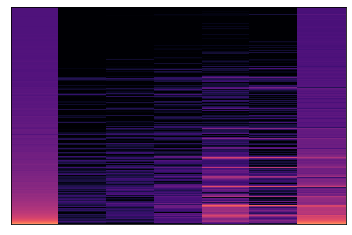

In [6]:
input_test0 = np.reshape(white_split[0, :], (1, white_split.shape[1]))
input_test1 = np.reshape(white_split[1, :], (1, white_split.shape[1]))
input_test2 = np.reshape(white_split[2, :], (1, white_split.shape[1]))
b = np.reshape(input_test0.T, (white_split.shape[1],))
c = np.reshape(input_test1.T, (white_split.shape[1],))
d = np.reshape(input_test2.T, (white_split.shape[1],))
a = np.concatenate((b, c, d))

c, t, Vxx_input_test = stft(a, fs=samplerate, nperseg=nperseg)
displaySpectrogram(Vxx_input_test)
plt.show()

input_test0 = np.reshape(clean_split[0, :], (1, clean_split.shape[1]))
input_test1 = np.reshape(clean_split[1, :], (1, clean_split.shape[1]))
input_test2 = np.reshape(clean_split[2, :], (1, clean_split.shape[1]))
b = np.reshape(input_test0.T, (clean_split.shape[1],))
c = np.reshape(input_test1.T, (clean_split.shape[1],))
d = np.reshape(input_test2.T, (clean_split.shape[1],))
a = np.concatenate((b, c, d))

c, t, Vxx_input_test = stft(a, fs=samplerate, nperseg=nperseg)
displaySpectrogram(Vxx_input_test)
plt.show()


for _ in range(10):
    model.fit(white_split, clean_split, epochs=15, batch_size=16)

    output_test0 = model.predict(input_test0)
    output_test1 = model.predict(input_test1)
    output_test2 = model.predict(input_test2)
    e = np.reshape(output_test0.T, (white_split.shape[1],))
    f = np.reshape(output_test1.T, (white_split.shape[1],))
    g = np.reshape(output_test2.T, (white_split.shape[1],))
    h = np.concatenate((e, f, g))
    c, t, Vxx_test = stft(h, fs=samplerate, nperseg=nperseg)
    displaySpectrogram(Vxx_test)
    plt.show()

In [7]:
i = [np.reshape(white_split[k, :], (1, white_split.shape[1])) for k in range(25)]
o = [model.predict(i[k]) for k in range(len(i))]
p = [np.reshape(i[k].T, (white_split.shape[1],)) for k in range(len(o))]
q = [np.reshape(o[k].T, (white_split.shape[1],)) for k in range(len(o))]


a = np.concatenate(p)
b = np.concatenate(q)
Audio(a, rate=samplerate)

In [8]:
Audio(b, rate=samplerate)